In [94]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [95]:
df = pd.read_csv("imdb_movies.csv")

In [96]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [98]:
len(df)

10178

# Check Duplication

In [99]:
# Check if any duplicated value in all rows
df.duplicated().sum()

0

# Data Preprocessing

## Change to datetime

In [100]:
df['date_x']

0        03/02/2023 
1        12/15/2022 
2        04/05/2023 
3        01/05/2023 
4        03/17/2023 
            ...     
10173    12/28/2016 
10174    08/24/1990 
10175    12/21/1990 
10176    07/11/1995 
10177    07/20/2020 
Name: date_x, Length: 10178, dtype: object

In [101]:
df['release_date'] = pd.to_datetime(df['date_x'], infer_datetime_format=True)

In [102]:
df['release_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10178 entries, 0 to 10177
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
10178 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 79.6 KB


## Check Missing Value

In [103]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,names,object,10178,9660,0
1,date_x,object,10178,5688,0
2,score,float64,10178,79,0
3,genre,object,10178,2304,85
4,overview,object,10178,9905,0
5,crew,object,10178,9928,56
6,orig_title,object,10178,9736,0
7,status,object,10178,3,0
8,orig_lang,object,10178,54,0
9,budget_x,float64,10178,2316,0


## Check Genre missing value

In [104]:
# remove genre has nan value 
filtered_genre = df.loc[df['genre'].isnull() == True]
filtered_genre

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_date
305,Housewife Sex Slaves: Hatano Yui,01/09/2015,0.0,NaN,We don't have an overview translated in Englis...,"Yui Hatano,",人妻性奴隷 波多野結衣,Released,Japanese,167540000.0,1.752700e+08,JP,2015-01-09
1174,Beauty Rope Cosmetology,12/02/1983,10.0,NaN,Miki is the daughter of an affluent family. Sh...,"Miki Takakura, Miki, Maya Ito, Rena, Ren Osugi...",団鬼六 美女縄化粧,Released,Japanese,201940000.0,3.815731e+07,JP,1983-12-02
1561,Reclaim,07/29/2022,20.0,NaN,She is a good woman living a fulfilling life. ...,NaN,Reclaim,Released,Chinese,12001040.0,3.813901e+07,US,2022-07-29
1762,Ancient Chinese Whorehouse,09/15/1994,50.0,NaN,Madam Five and carpenter Kong work together ma...,"Kent Cheng, Kong, Yvonne Yung Hung, Miss Ng, S...",青樓十二房,Released,Cantonese,163600000.0,8.126672e+08,HK,1994-09-15
1776,Porno document: Toruko tokkyû bin,02/26/1982,100.0,NaN,Pinku from 1982.,"Jun Miho, , Rumi Kagawa, , Miyuki Oka, , Kayok...",ポルノドキュメント トルコ特急便,Released,Japanese,201000000.0,1.569324e+09,JP,1982-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,Euphoria,11/29/2022,0.0,NaN,Artist and filmmaker Julian Rosefeldt creates ...,"Giancarlo Esposito, Taxi Driver, Virginia Newc...",Euphoria,Released,English,167540000.0,1.752700e+08,US,2022-11-29
9733,Fanatic,04/06/2023,0.0,NaN,Charlie and Gerald reunite their failed 2000's...,"Matt Cook, , Caroline Rhea, , Shannon Dang, , ...",Fanatic,Released,English,167540000.0,1.752700e+08,US,2023-04-06
10011,Perfumed Garden,06/03/2000,53.0,NaN,"Imagine a world of pleasure, where passion is ...","Ivan Baccarat, Michael, Amy Lindsay, Lisa, Raj...",Perfumed Garden,Released,English,159000000.0,2.792784e+08,ID,2000-06-03
10025,The Girl and the Wooden Horse Torture,12/03/1982,50.0,NaN,Nami is a masochistic high school student who ...,"Serina Nishikawa, Nami Tsuchiya, Waka Oda, , A...",団鬼六 少女木馬責め,Released,Japanese,163600000.0,8.126672e+08,JP,1982-12-03


In [105]:
df = df.dropna(subset=['genre'])

## Check Crew missing value

In [106]:
# remove genre has nan value 
filtered_crew = df.loc[df['crew'].isnull() == True]
filtered_crew

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_date
148,Orgasm Inc: The Story of OneTaste,11/05/2022,64.0,Documentary,A sexual wellness company gains fame and follo...,NaN,Orgasm Inc: The Story of OneTaste,Released,English,77400000.0,431611098.0,US,2022-11-05
206,Legend of the Galactic Heroes: Die Neue These ...,09/30/2022,61.0,Animation,The story focuses on the exploits of rivals Re...,NaN,銀河英雄伝説 Die Neue These 策謀 1,Released,Japanese,138000000.0,337725907.8,JP,2022-09-30
649,Cuento de Primavera-A Spring Tale,12/20/2022,81.0,"Drama, Fantasy, Mystery",We don't have an overview translated in Englis...,NaN,Cuento de Primavera-A Spring Tale,Released,"Spanish, Castilian",77600000.0,827017257.2,US,2022-12-20
938,Cat Pack: A PAW Patrol Exclusive Event,06/24/2022,74.0,"Animation, Family",When Mayor Humdinger transforms his robot cat ...,NaN,Cat Pack: A PAW Patrol Exclusive Event,Released,English,92800000.0,609222681.4,US,2022-06-24
1752,Avatar: Scene Deconstruction,12/18/2009,71.0,Documentary,The deconstruction of the Avatar scenes and sets,NaN,Avatar: Scene Deconstruction,Released,English,90100000.0,414551647.4,US,2009-12-18
1828,Cyber Hell: Exposing an Internet Horror,05/18/2022,73.0,Documentary,"Anonymous and exploitative, a network of onlin...",NaN,사이버 지옥: n번방을 무너뜨려라,Released,Korean,53600000.0,682429959.6,KR,2022-05-18
1881,Guinea Pig: Devil's Experiment,09/04/1985,47.0,Horror,A group of guys capture a young girl with the ...,NaN,ギニーピッグ 悪魔の実験,Released,Japanese,57800000.0,519287241.4,US,1985-09-04
2622,Naruto ga Hokage Ni Natta Hi,07/06/2016,68.0,"Animation, Drama, Fantasy",Depicts the day that Naruto Uzumaki became the...,NaN,ナルトが火影になった日,Released,Japanese,143800000.0,530439143.0,JP,2016-07-06
2795,Far from the Tree,11/24/2021,81.0,"Animation, Family","On an idyllic beach in the Pacific Northwest, ...",NaN,Far from the Tree,Released,English,149860000.0,607464200.4,US,2021-11-24
2955,Ki Main Jhoot Boleya,03/24/2023,0.0,"Romance, Comedy","Manvir, a down-on-luck NRI, has to find a job ...",NaN,Ki Main Jhoot Boleya,Released,English,213940000.0,178359863.0,IN,2023-03-24


In [107]:
df = df.dropna(subset=['crew'])

## After drop missing value

In [108]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,names,object,10052,9538,0
1,date_x,object,10052,5642,0
2,score,float64,10052,78,0
3,genre,object,10052,2300,0
4,overview,object,10052,9810,0
5,crew,object,10052,9857,0
6,orig_title,object,10052,9614,0
7,status,object,10052,3,0
8,orig_lang,object,10052,53,0
9,budget_x,float64,10052,2311,0


In [109]:
df['status'].unique()

array([' Released', ' Post Production', ' In Production'], dtype=object)

In [110]:
df['genre']

0                                            Drama, Action
1                       Science Fiction, Adventure, Action
2            Animation, Adventure, Family, Fantasy, Comedy
3            Animation, Comedy, Family, Adventure, Fantasy
4                                                   Action
                               ...                        
10173                                                Drama
10174                                               Action
10175                             Drama, Thriller, Romance
10176    Action, Adventure, Science Fiction, Thriller, ...
10177                           Animation, Family, Fantasy
Name: genre, Length: 10052, dtype: object

In [111]:
df['country'].unique()

array(['AU', 'US', 'MX', 'GB', 'CL', 'NO', 'ES', 'AR', 'KR', 'HK', 'UA',
       'IT', 'RU', 'CO', 'DE', 'JP', 'FR', 'FI', 'IS', 'ID', 'BR', 'BE',
       'DK', 'TR', 'TH', 'PL', 'GT', 'CN', 'CZ', 'PH', 'ZA', 'CA', 'NL',
       'TW', 'PR', 'IN', 'IE', 'SG', 'PE', 'CH', 'SE', 'IL', 'DO', 'VN',
       'GR', 'SU', 'HU', 'BO', 'SK', 'UY', 'AT', 'PY', 'MY', 'MU', 'XC',
       'PT', 'IR'], dtype=object)

## Genre into list

In [112]:
# Function to split and remove \xa0 from genre strings
def split_genre(genre_string):
    genre_list = [genre.strip().replace('\xa0', '') for genre in genre_string.split(',')]
    return genre_list

# Apply the function to the 'genre' column and create a new 'genre_split' column
df['genre_split'] = df['genre'].apply(split_genre)

In [113]:
set_of_genre = set()
for genres in df['genre_split']:
    for genre in genres:
        set_of_genre.add(genre)

In [114]:
set_of_genre

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [115]:
# Perform one-hot encoding for genres
one_hot_encoding = pd.get_dummies(df['genre_split'].apply(pd.Series).stack()).sum(level=0)

C:\Users\user\AppData\Local\Temp\ipykernel_19780\1301492374.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_encoding = pd.get_dummies(df['genre_split'].apply(pd.Series).stack()).sum(level=0)


In [116]:
one_hot_encoding

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10174,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10175,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
10176,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [117]:
# Concatenate the one-hot encoded genres with the original DataFrame
df = pd.concat([df, one_hot_encoding], axis=1)

In [118]:
# df.drop(columns=['genre_split','genre'], inplace=True)

In [119]:
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,0,0,0,0,0,0,0,0,0,0
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,0,0,0,0,0,1,0,0,0,0
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,0,0,0,0,0,0,0,0,0,0
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,0,0,0,0,0,0,0,0,0,0
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,...,0,0,0,0,0,0,0,0,0,0
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,...,0,0,0,0,0,0,0,0,0,0
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,...,0,0,0,0,1,0,0,1,0,0
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,...,0,1,0,0,0,1,0,1,0,0


## Check revenue & Budget

In [120]:
df['revenue']

0        2.716167e+08
1        2.316795e+09
2        7.244590e+08
3        3.420000e+07
4        3.409420e+08
             ...     
10173    9.353729e+06
10174    6.698361e+06
10175    2.299799e+07
10176    4.756613e+08
10177    5.394018e+08
Name: revenue, Length: 10052, dtype: float64

In [121]:
# Custom function to format the revenue as a dollar value
def format_value(value):
    locale.setlocale(locale.LC_ALL, '')  # Set the locale to the default system locale
    return locale.currency(value, grouping=True)

# Apply the custom function to format revenue in the DataFrame
df['revenue_formatted'] = df['revenue'].apply(format_value)
df['budget_formatted'] = df['budget_x'].apply(format_value)

df['revenue_formatted'] = df['revenue_formatted'].str.replace('[Rp,.]', '', regex=True).astype(float)
df['budget_formatted'] = df['budget_formatted'].str.replace('[Rp,.]', '', regex=True).astype(float)

## origin languange

In [122]:
# Function to split and remove \xa0 from genre strings
def split_origin(origin_string):
    origin_list = [origin.strip().replace('\xa0', '') for origin in origin_string.split(',')]
    return origin_list

# Apply the function to the 'genre' column and create a new 'genre_split' column
df['origin_lang_split'] = df['orig_lang'].apply(split_genre)

In [123]:
set_of_origin_lang = set()
for origin_langs in df['origin_lang_split']:
    for origin_lang in origin_langs:
        set_of_origin_lang.add(origin_lang)
        
set_of_origin_lang

{'Arabic',
 'Basque',
 'Bengali',
 'Bokmål',
 'Cantonese',
 'Castilian',
 'Catalan',
 'Central Khmer',
 'Chinese',
 'Czech',
 'Danish',
 'Dutch',
 'Dzongkha',
 'English',
 'Finnish',
 'Flemish',
 'French',
 'Galician',
 'German',
 'Greek',
 'Gujarati',
 'Hindi',
 'Hungarian',
 'Icelandic',
 'Indonesian',
 'Irish',
 'Italian',
 'Japanese',
 'Kannada',
 'Korean',
 'Latin',
 'Latvian',
 'Macedonian',
 'Malay',
 'Malayalam',
 'No Language',
 'Norwegian',
 'Norwegian Bokmål',
 'Oriya',
 'Persian',
 'Polish',
 'Portuguese',
 'Romanian',
 'Russian',
 'Serbian',
 'Serbo-Croatian',
 'Slovak',
 'Spanish',
 'Swedish',
 'Tagalog',
 'Tamil',
 'Telugu',
 'Thai',
 'Turkish',
 'Ukrainian',
 'Valencian',
 'Vietnamese'}

In [124]:
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_formatted,budget_formatted,origin_lang_split
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,0,0,0,0,0,0,0,2.716167e+08,75000000.0,[English]
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,0,0,1,0,0,0,0,2.316795e+09,460000000.0,[English]
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,0,0,0,0,0,0,0,7.244590e+08,100000000.0,[English]
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,0,0,0,0,0,0,0,3.420000e+07,12300000.0,"[Spanish, Castilian]"
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,...,0,0,0,0,0,0,0,3.409420e+08,77000000.0,[English]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,...,0,0,0,0,0,0,0,9.353729e+06,7000000.0,[English]
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,...,0,0,0,0,0,0,0,6.698361e+06,9145818.0,[English]
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,...,0,1,0,0,1,0,0,2.299799e+07,21800000.0,[English]
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,...,0,0,1,0,1,0,0,4.756613e+08,116000000.0,[English]


In [125]:
df_model = df[['names','score','genre_split','origin_lang_split','crew','overview','status','revenue','country','release_date']].copy()

df_model = df[['names','overview','genre','score']]


## overview

In [126]:
df['overview'].iloc[0]

'After dominating the boxing world, Adonis Creed has been thriving in both his career and family life. When a childhood friend and former boxing prodigy, Damien Anderson, resurfaces after serving a long sentence in prison, he is eager to prove that he deserves his shot in the ring. The face-off between former friends is more than just a fight. To settle the score, Adonis must put his future on the line to battle Damien — a fighter who has nothing to lose.'

## Realease date

In [127]:
date_range = df['release_date'].max() - df['release_date'].min()

# Convert the difference to years
years_range = date_range.days / 365.25  # 365.25 accounts for leap years

print("The range between the earliest and latest release dates is approximately {:.2f} years.".format(years_range))

The range between the earliest and latest release dates is approximately 120.63 years.


## Score Rating

In [128]:
df.loc[df['score'] == 0]

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_formatted,budget_formatted,origin_lang_split
117,Fast X,05/19/2023,0.0,"Action, Crime, Thriller",Over many missions and against impossible odds...,"Vin Diesel, Dominic Toretto, Michelle Rodrigue...",Fast X,Post Production,English,340000000.0,...,0,0,0,0,1,0,0,0.0,340000000.0,[English]
216,The Little Mermaid,05/26/2023,0.0,"Adventure, Family, Fantasy, Romance","The youngest of King Triton’s daughters, and t...","Halle Bailey, Ariel, Jonah Hauer-King, Prince ...",The Little Mermaid,Post Production,English,205000000.0,...,0,1,0,0,0,0,0,178359863.0,205000000.0,[English]
229,Transformers: Rise of the Beasts,06/09/2023,0.0,"Action, Adventure, Science Fiction",A ‘90s globetrotting adventure that introduces...,"Anthony Ramos, Noah, Dominique Fishback, Elena...",Transformers: Rise of the Beasts,Post Production,English,200000000.0,...,0,0,1,0,0,0,0,1240262.0,200000000.0,[English]
231,Spider-Man: Across the Spider-Verse,06/02/2023,0.0,"Animation, Action, Adventure, Science Fiction","After reuniting with Gwen Stacy, Miles Morales...","Shameik Moore, Miles Morales / Spider-Man (voi...",Spider-Man: Across the Spider-Verse,Post Production,English,264940000.0,...,0,0,1,0,0,0,0,175269999.0,264940000.0,[English]
373,Barbie,07/21/2023,0.0,Comedy,To live in Barbie Land is to be a perfect bein...,"Margot Robbie, Barbie, Ryan Gosling, Ken, Amer...",Barbie,Post Production,English,175000000.0,...,0,0,0,0,0,0,0,178359863.0,175000000.0,[English]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9747,Step Up Love Story: Double Love,05/10/2019,0.0,Comedy,After three years of marriage and a bit more k...,"Hikaru Aoyama, Yura Onoda, Tama Mizuki, Naomi ...",映画版 ふたりエッチ ダブル・ラブ,Released,Japanese,264940000.0,...,0,0,0,0,0,0,0,175269999.0,264940000.0,[Japanese]
9769,Dinner,04/06/2023,0.0,"Thriller, Horror",Johnny is extremely nervous to meet his girlfr...,"Keegan McLean deWitt, Johnny, Fabiola De Viver...",Dinner,Released,English,170000000.0,...,0,0,0,0,1,0,0,178359863.0,170000000.0,[English]
9776,Delicious Sisters,12/19/2018,0.0,Romance,Hyun-ji and Jin-hee are university friends. On...,"Yoo Sul-young, , Kang Jae-hee, , Tae Bong, , S...",맛있는누나들,Released,Korean,181600000.0,...,0,1,0,0,0,0,0,175269999.0,181600000.0,[Korean]
9877,Detective Conan: Haibara Ai Monogatari ~Kuroga...,01/06/2023,0.0,Animation,We don't have an overview translated in Englis...,"Minami Takayama, Conan Edogawa (voice), Megumi...",名探偵コナン 灰原哀物語～黒鉄のミステリートレイン～,Released,Japanese,131600000.0,...,0,0,0,0,0,0,0,178359863.0,131600000.0,[Japanese]


# EDA

## Bagaimana distribusi rating film dalam dataset?

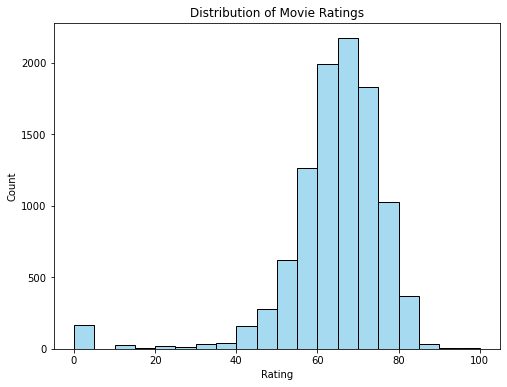

In [129]:
# Assuming 'df' is your DataFrame containing the 'rating' column
# If your rating column is named differently, replace 'rating' with the correct column name.

# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='score', bins=20, kde=False, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

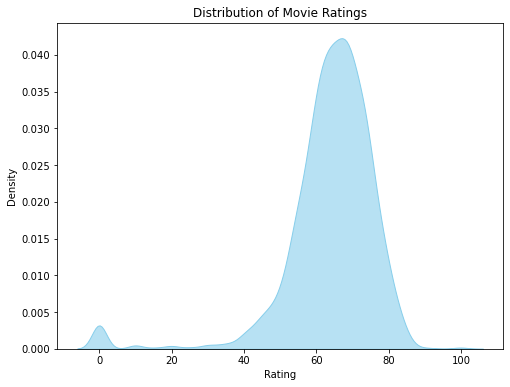

In [130]:
# Create a KDE plot to visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='score', fill=True, color='skyblue', alpha=0.6)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

## Bagaimana distribusi pendapatan (revenue) dan budget film dalam dataset?


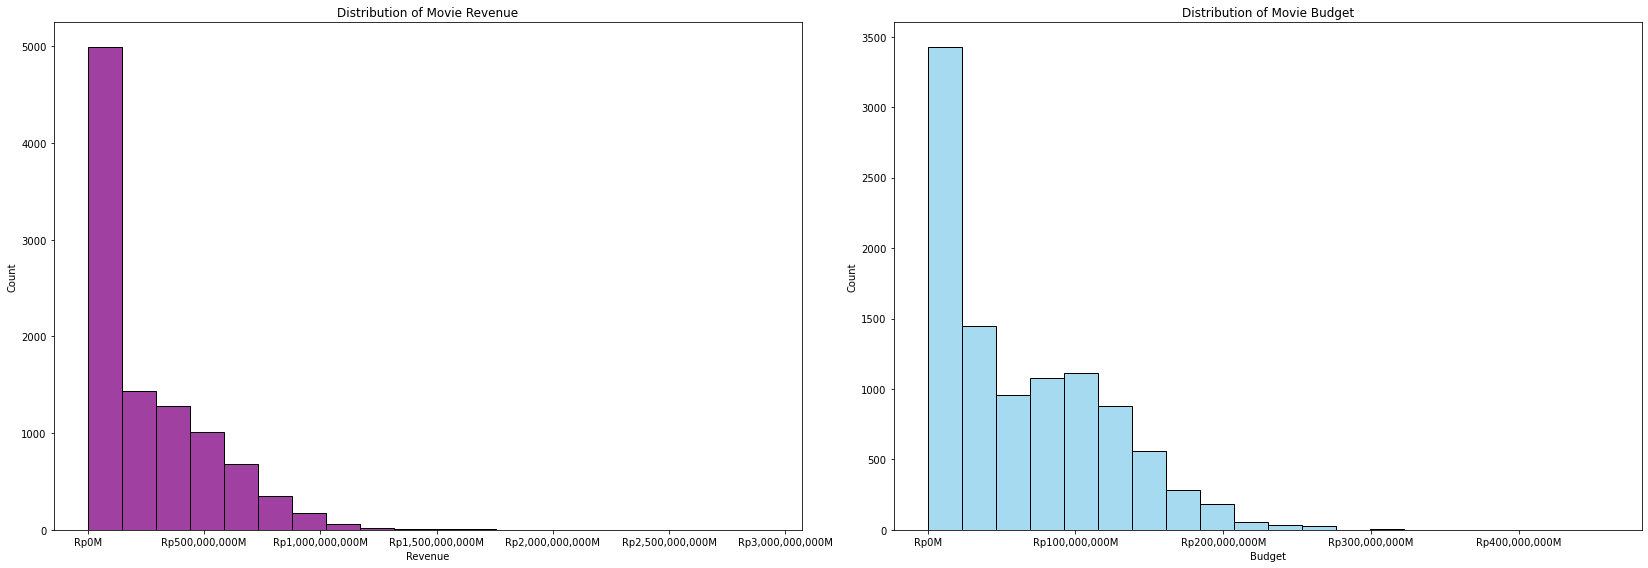

In [131]:
# Create subplots with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 8))

# Plot for Revenue
sns.histplot(data=df, x='revenue_formatted', bins=20, kde=False, color='purple', ax=ax1)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax1.set_title('Distribution of Movie Revenue')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Count')

# Plot for Budget
sns.histplot(data=df, x='budget_formatted', bins=20, kde=False, color='skyblue', ax=ax2)
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax2.set_title('Distribution of Movie Budget')
ax2.set_xlabel('Budget')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

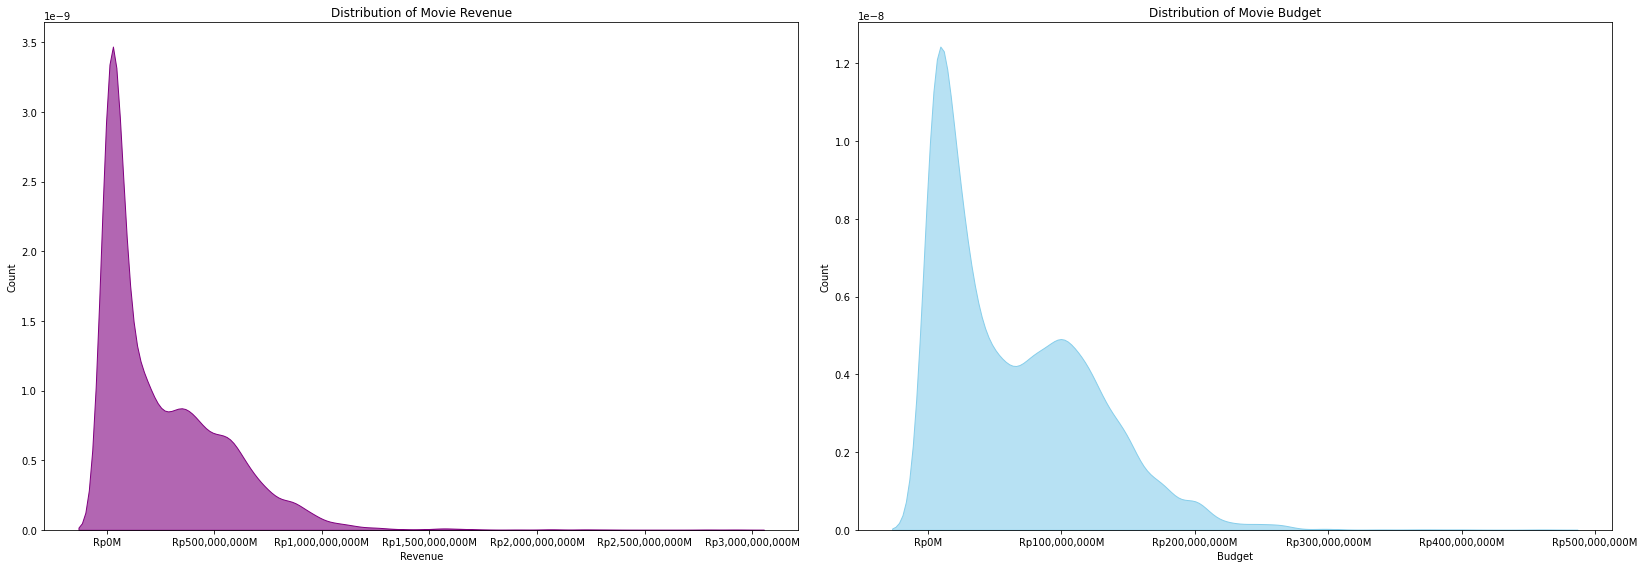

In [132]:
# Create subplots with two plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 8))

# Plot for Revenue
sns.kdeplot(data=df, x='revenue_formatted',  fill=True, color='purple', alpha=0.6, ax=ax1)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax1.set_title('Distribution of Movie Revenue')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Count')

# Plot for Budget
sns.kdeplot(data=df, x='budget_formatted',  fill=True, color='skyblue', alpha=0.6,  ax=ax2)
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('Rp{x:,.0f}M'))
ax2.set_title('Distribution of Movie Budget')
ax2.set_xlabel('Budget')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Apakah ada korelasi antara anggaran produksi dan pendapatan film?


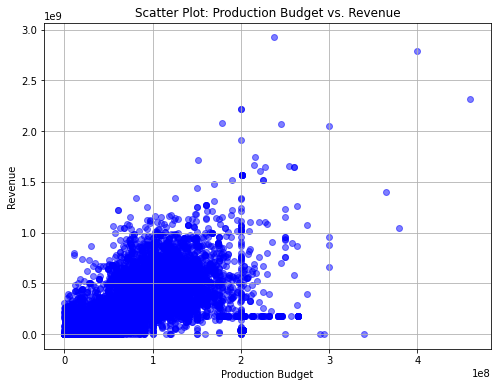

Correlation coefficient between production budget and revenue: 0.6827657476113765


In [133]:
# Create a scatter plot to visualize the relationship between production budget and revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['budget_formatted'], df['revenue_formatted'], alpha=0.5, color='b')
plt.title('Scatter Plot: Production Budget vs. Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between production budget and revenue
correlation_coefficient = df['budget_formatted'].corr(df['revenue_formatted'])
print("Correlation coefficient between production budget and revenue:", correlation_coefficient)

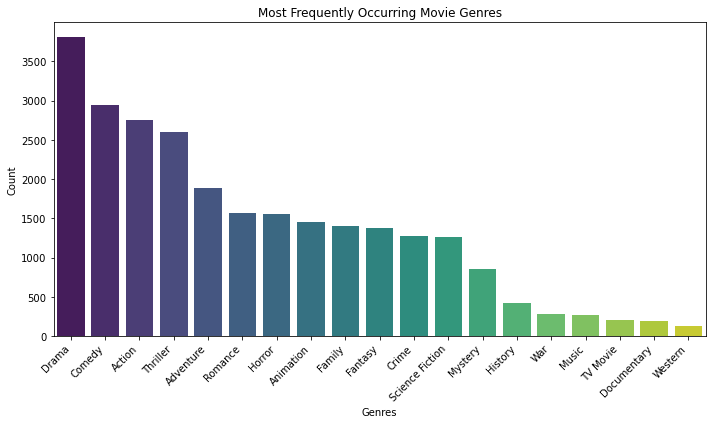

In [134]:
# Split multiple genres in the 'genres' column and create a new DataFrame
genre_counts = df['genre'].str.split(',').explode().str.strip().value_counts()

# Create a bar plot to visualize the most frequent movie genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Most Frequently Occurring Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bagaimana distribusi tahun rilis film dalam dataset?

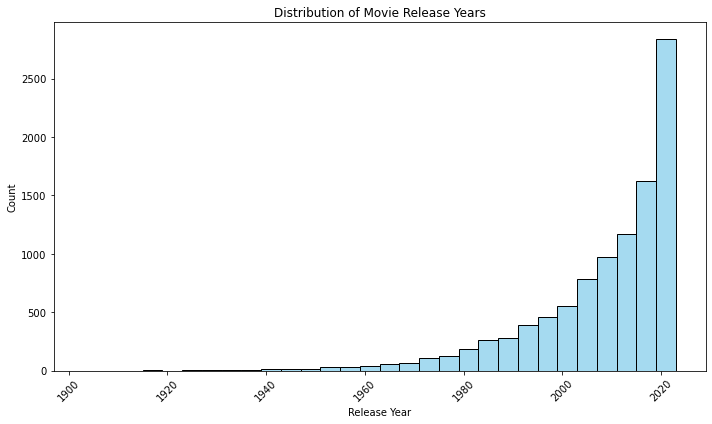

In [135]:
# Extract the release year from the 'release_date' column and create a new column 'release_year'
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Create a histogram to visualize the distribution of movie release years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='skyblue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Apakah ada tren peningkatan atau penurunan jumlah film dari waktu ke waktu?

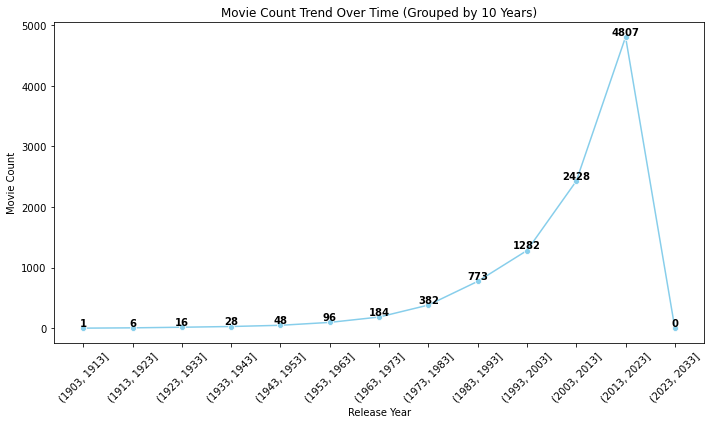

In [159]:
# Group the data by release year and count the number of movies for each year
movie_count_by_year = df['release_year'].value_counts().sort_index()

# Create bins of 10 years
bins = range(df['release_year'].min(), df['release_year'].max() + 11, 10)

# Group movie counts into bins of 10 years and sum the counts in each bin
movie_count_by_bin = df.groupby(pd.cut(df['release_year'], bins=bins)).size()

# Create a line plot to visualize the movie count trend over time with 10-year bins
plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_count_by_bin.index.astype(str), y=movie_count_by_bin.values, marker='o', color='skyblue')
plt.title('Movie Count Trend Over Time (Grouped by 10 Years)')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data point labels (dot values) to the line plot
for i, count in enumerate(movie_count_by_bin.values):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

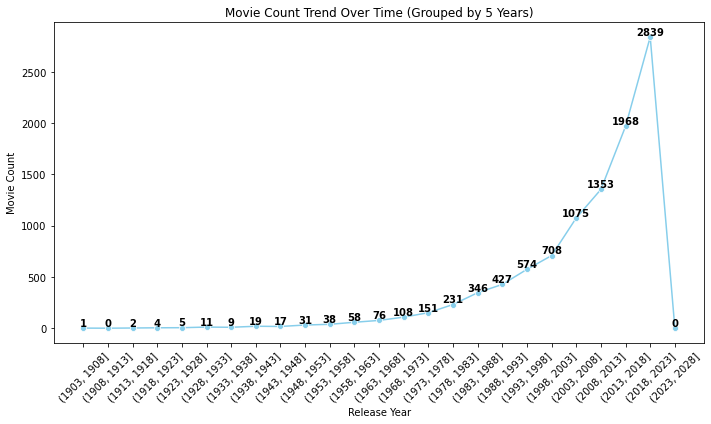

In [160]:
# Group the data by release year and count the number of movies for each year
movie_count_by_year = df['release_year'].value_counts().sort_index()

# Create bins of 5 years
bins = range(df['release_year'].min(), df['release_year'].max() + 6, 5)

# Group movie counts into bins of 5 years and sum the counts in each bin
movie_count_by_bin = df.groupby(pd.cut(df['release_year'], bins=bins)).size()

# Create a line plot to visualize the movie count trend over time with 5-year bins
plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_count_by_bin.index.astype(str), y=movie_count_by_bin.values, marker='o', color='skyblue')
plt.title('Movie Count Trend Over Time (Grouped by 5 Years)')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data point labels (dot values) to the line plot
for i, count in enumerate(movie_count_by_bin.values):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

# Modeling

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [99]:
X = np.array(df_model.overview)

text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/315 [00:00<?, ?it/s]

In [119]:
embed_data = embeddings

In [126]:
rating_score = np.array(df_model.score)

# Concatenate additional features with embeddings
additional_features = np.column_stack((rating_score, one_hot_encoding))  # Adjust this based on your features

combined_features = np.concatenate((embeddings, additional_features), axis=1)

In [127]:
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(combined_features)
pca_data = pd.DataFrame(pca.transform(combined_features))
pca_data.head()

,0,1,2,3,4
0,-9.300633,-1.249492,2.702313,-0.115276,-3.830240
1,-14.224997,2.553465,-0.095315,3.108104,-0.368237
2,-12.236611,-1.773772,3.259371,-1.204160,-0.572135
3,-6.218966,-0.866821,0.722802,-0.075747,0.376740
4,2.729626,-0.490431,2.462909,0.388406,-3.430916


In [133]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
    index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
    print(index_recomm)
    movies_recomm =  df_model['names'].loc[index_recomm].values
    score_recomm =  df_model['score'].loc[index_recomm].values
    result = {'Movies':movies_recomm,'Index':index_recomm, 'Score': score_recomm}
    if print_recommendation==True:
        print('The watched movie is this one: %s \n'%(df_model['names'].loc[index]))
        k=1
        for movie in movies_recomm:
            print('The number %i recommended movie is this one: %s \n'%(k,movie))
    if print_recommendation_plots==True:
        print('The plot of the watched movie is this one:\n %s \n'%(df_model['overview'].loc[index]))
        k=1
        for q in range(len(movies_recomm)):
            plot_q = data['Overview'].loc[index_recomm[q]]
            print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
            k=k+1
    if print_genres==True:
        print('The genres of the watched movie is this one:\n %s \n'%(df_model['genre'].loc[index]))
        k=1
        for q in range(len(movies_recomm)):
            plot_q = data['Genre'].loc[index_recomm[q]]
            print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
            k=k+1
    return result

In [135]:
give_recommendations(10,True)

[595, 893, 4752, 438, 5132]
The watched movie is this one: Winnie the Pooh: Blood and Honey 

The number 1 recommended movie is this one: Trolls World Tour 

The number 1 recommended movie is this one: The Jungle Book 

The number 1 recommended movie is this one: Gerald's Game 

The number 1 recommended movie is this one: Naruto Shippuden the Movie 

The number 1 recommended movie is this one: North by Northwest 



{'Movies': array(['Trolls World Tour', 'The Jungle Book', "Gerald's Game",
        'Naruto Shippuden the Movie', 'North by Northwest'], dtype=object),
 'Index': [595, 893, 4752, 438, 5132],
 'Score': array([74., 73., 64., 72., 80.])}